In [3]:
pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
torch.__version__

'1.12.1'

In [5]:
pip install torchvision

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
from xml.dom.minidom import Document
import os
import cv2


# def makexml(txtPath, xmlPath, picPath):  # txt所在文件夹路径，xml文件保存路径，图片所在文件夹路径
def makexml(picPath, txtPath, xmlPath):  # txt所在文件夹路径，xml文件保存路径，图片所在文件夹路径
    """此函数用于将yolo格式txt标注文件转换为voc格式xml标注文件
    """
    dic = {'0': "crazing",  # 创建字典用来对类型进行转换
           '1': "inclusion",  # 此处的字典要与自己的classes.txt文件中的类对应，且顺序要一致
           '2' :'patches',
           '3' :'pitted_surface',
           '4' :'rolled-in_scale',
           '5' :'scratches'
           }
    files = os.listdir(txtPath)
    for i, name in enumerate(files):
        print(name)
        xmlBuilder = Document()
        annotation = xmlBuilder.createElement("annotation")  # 创建annotation标签
        xmlBuilder.appendChild(annotation)
        txtFile = open(txtPath + name)
        txtList = txtFile.readlines()
        img = cv2.imread(picPath + name[0:-4] + ".jpg")
        Pheight, Pwidth, Pdepth = img.shape

        folder = xmlBuilder.createElement("folder")  # folder标签
        foldercontent = xmlBuilder.createTextNode("driving_annotation_dataset")
        folder.appendChild(foldercontent)
        annotation.appendChild(folder)  # folder标签结束

        filename = xmlBuilder.createElement("filename")  # filename标签
        filenamecontent = xmlBuilder.createTextNode(name[0:-4] + ".jpg")
        filename.appendChild(filenamecontent)
        annotation.appendChild(filename)  # filename标签结束

        size = xmlBuilder.createElement("size")  # size标签
        width = xmlBuilder.createElement("width")  # size子标签width
        widthcontent = xmlBuilder.createTextNode(str(Pwidth))
        width.appendChild(widthcontent)
        size.appendChild(width)  # size子标签width结束

        height = xmlBuilder.createElement("height")  # size子标签height
        heightcontent = xmlBuilder.createTextNode(str(Pheight))
        height.appendChild(heightcontent)
        size.appendChild(height)  # size子标签height结束

        depth = xmlBuilder.createElement("depth")  # size子标签depth
        depthcontent = xmlBuilder.createTextNode(str(Pdepth))
        depth.appendChild(depthcontent)
        size.appendChild(depth)  # size子标签depth结束

        annotation.appendChild(size)  # size标签结束

        for j in txtList:
            oneline = j.strip().split(" ")
            object = xmlBuilder.createElement("object")  # object 标签
            picname = xmlBuilder.createElement("name")  # name标签
            namecontent = xmlBuilder.createTextNode(dic[oneline[0]])
            picname.appendChild(namecontent)
            object.appendChild(picname)  # name标签结束

            pose = xmlBuilder.createElement("pose")  # pose标签
            posecontent = xmlBuilder.createTextNode("Unspecified")
            pose.appendChild(posecontent)
            object.appendChild(pose)  # pose标签结束

            truncated = xmlBuilder.createElement("truncated")  # truncated标签
            truncatedContent = xmlBuilder.createTextNode("0")
            truncated.appendChild(truncatedContent)
            object.appendChild(truncated)  # truncated标签结束

            difficult = xmlBuilder.createElement("difficult")  # difficult标签
            difficultcontent = xmlBuilder.createTextNode("0")
            difficult.appendChild(difficultcontent)
            object.appendChild(difficult)  # difficult标签结束

            bndbox = xmlBuilder.createElement("bndbox")  # bndbox标签
            xmin = xmlBuilder.createElement("xmin")  # xmin标签
            mathData = int(((float(oneline[1])) * Pwidth + 1) - (float(oneline[3])) * 0.5 * Pwidth)
            xminContent = xmlBuilder.createTextNode(str(mathData))
            xmin.appendChild(xminContent)
            bndbox.appendChild(xmin)  # xmin标签结束

            ymin = xmlBuilder.createElement("ymin")  # ymin标签
            mathData = int(((float(oneline[2])) * Pheight + 1) - (float(oneline[4])) * 0.5 * Pheight)
            yminContent = xmlBuilder.createTextNode(str(mathData))
            ymin.appendChild(yminContent)
            bndbox.appendChild(ymin)  # ymin标签结束

            xmax = xmlBuilder.createElement("xmax")  # xmax标签
            mathData = int(((float(oneline[1])) * Pwidth + 1) + (float(oneline[3])) * 0.5 * Pwidth)
            xmaxContent = xmlBuilder.createTextNode(str(mathData))
            xmax.appendChild(xmaxContent)
            bndbox.appendChild(xmax)  # xmax标签结束

            ymax = xmlBuilder.createElement("ymax")  # ymax标签
            mathData = int(((float(oneline[2])) * Pheight + 1) + (float(oneline[4])) * 0.5 * Pheight)
            ymaxContent = xmlBuilder.createTextNode(str(mathData))
            ymax.appendChild(ymaxContent)
            bndbox.appendChild(ymax)  # ymax标签结束

            object.appendChild(bndbox)  # bndbox标签结束

            annotation.appendChild(object)  # object标签结束

        f = open(xmlPath + name[0:-4] + ".xml", 'w')
        xmlBuilder.writexml(f, indent='\t', newl='\n', addindent='\t', encoding='utf-8')
        f.close()


if __name__ == "__main__":
    picPath = "D:/d2l-zh/pytorch/object_detection/NEU-DET/yolov5-7.0-YOLOv5s/data/NEU_DET/images/val/"  # 图片所在文件夹路径，后面的/一定要带上
    txtPath = "D:/d2l-zh/pytorch/object_detection/NEU-DET/yolov5-7.0-YOLOv5s/data/NEU_DET/labels/val/"  # txt所在文件夹路径，后面的/一定要带上
    xmlPath = "D:/d2l-zh/pytorch/object_detection/NEU-DET/yolov5-7.0-YOLOv5s/data/NEU_DET/annotations/val/"  # xml文件保存路径，后面的/一定要带上
    makexml(picPath, txtPath, xmlPath)



classes.txt


AttributeError: 'NoneType' object has no attribute 'shape'

regions number: 26498


(200, 200, 3)

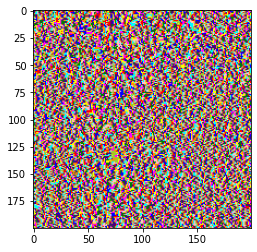

In [59]:
import numpy as np
import scipy.ndimage as ndi
import cv2
from skimage import measure
from skimage import color
import matplotlib.pyplot as plt

image = cv2.imread('D:/d2l-zh/pytorch/object_detection/NEU-DET/yolov5-7.0-YOLOv5s/data/NEU_DET/images/train/inclusion_63.jpg')
labels = measure.label(image[:,:,0], connectivity=1) #4连通区域标记
dst = color.label2rgb(labels) #根据不同的标记显示不同的颜色
plt.imshow(dst)
print('regions number:', labels.max()+1) 

image.shape